# White Wine Quality Analysis

## Data Preprocessing

First we import some initial libraries that are important for this project. Then we use pandas to read the csv and get some descriptive statistcs. We will also divide the entries in two classes: Class 0 coresponds to wines that their quality is lower than 7/10 and class 1 corresponds to wines that their quality is greater than or equal to 7/10.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 'large' # we want our axes to have larger fonts

import seaborn as sns

In [2]:
data = pd.read_csv('winequality-white.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Quality shoudn't be part of the feature list
feature_list = data.columns.tolist()
feature_list.pop()

'quality'

In [4]:
print('There are {} data entries, and {} features to be used to develop the predictive model.'
      .format(len(data), len(data.columns) - 1)) # the quality column is our target.

There are 4898 data entries, and 11 features to be used to develop the predictive model.


Our target column is called 'quality'. We see that there are 4898 data entries and 11 features. Let's get some statistics for each column.

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.200
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.100
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.660
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.800
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.346
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.000
density,4898.0,1.548363,6.838541,0.98711,0.991723,0.99374,0.9961,103.898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.820
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.080


There are a few interesting points: <br/>
$\bullet$ the average value of the pH is 3.188 and the maximum is 3.82. That means that the pH of most wines is very close to the mean. <br/>
$\bullet$ the quality score of around 75% of the total entries is less or equal to 6. <br/>
$\bullet$ all the features are numerical and they have different scales. Apart from the tree algorithms, many need to be trained and tested in standardized data.

Now it's time to create the column that will have the indication of class or class 1. 

In [6]:
def make_class(x):
    '''
    Given the quality score, it assigns the right the class 
    '''
    
    assert x >= 0
    return int(x >= 7)

In [7]:
data['class'] = data['quality'].apply(make_class)

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


## Data Exploration and Visualization

First, lets see the distribution of quality scores.

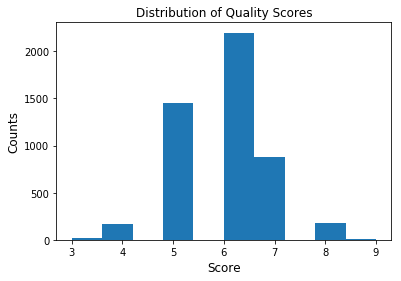

In [9]:
plt.hist(data['quality'])
plt.title('Distribution of Quality Scores')
plt.xlabel('Score')
plt.ylabel('Counts')
plt.savefig('Quality   Distribution', dpi=500)
plt.show()

We observe that the quality score of most of the data entries is 6. Let's calculate the percentage of class 0 and class 1 entries.

In [10]:
n_class_0 = len(data[data['class'] == 0])
n_class_1 = len(data[data['class'] == 1])

print('There are {} entries that belong to class 0 and {} entries that belong to class 1'.
     format(n_class_0, n_class_1)) 
print('{:.1f} % of the entries belong to class 0 and {:.1f} % of the entries belong to class 1'.
     format(100 * n_class_0 /len(data), 100 * n_class_1 / len(data)))

There are 3838 entries that belong to class 0 and 1060 entries that belong to class 1
78.4 % of the entries belong to class 0 and 21.6 % of the entries belong to class 1


In [11]:
g = sns.pairplot(data[feature_list])

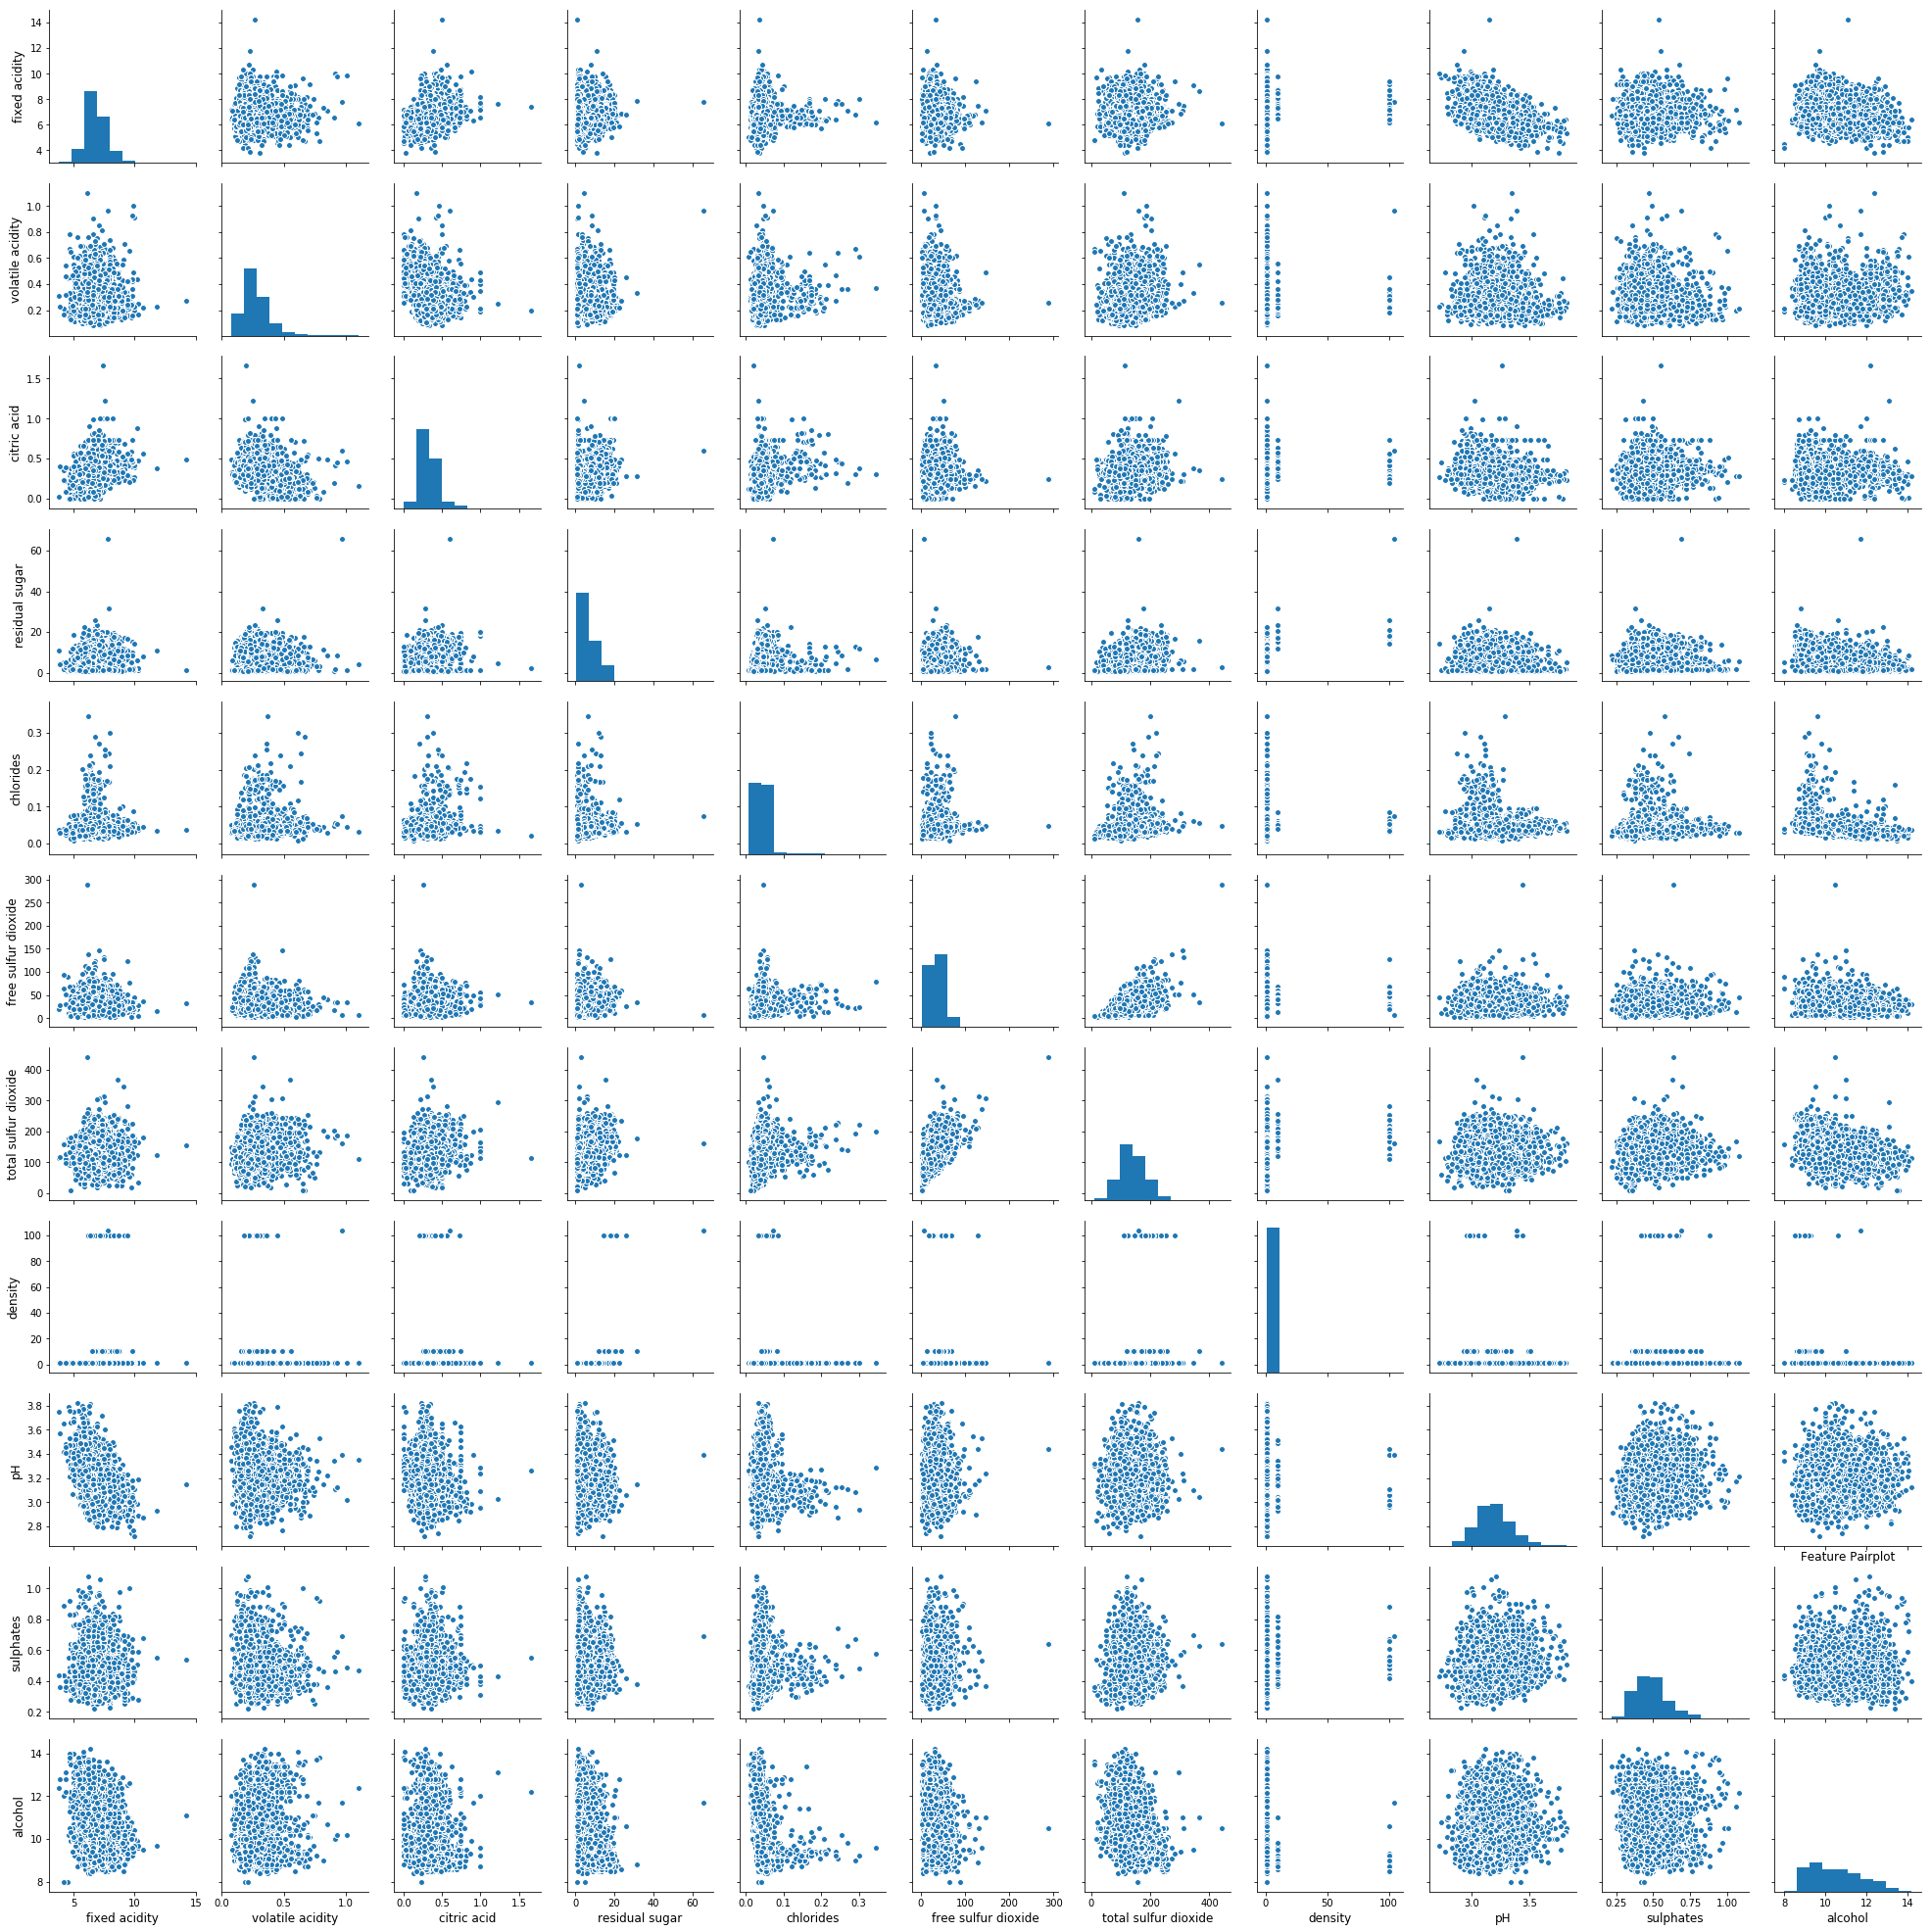

In [12]:
plt.title('Feature Pairplot')
plt.savefig('FeaturePairplot', dpi=100)
plt.show()

One of the most important chemical features of wine is alcohol, and for that reason we visualize below the distribution of alcohol percentages. 

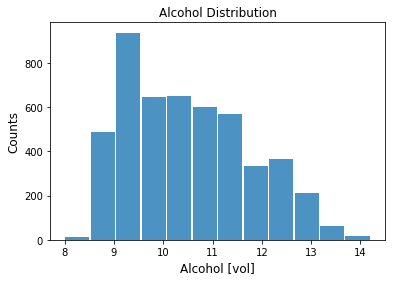

In [13]:
plt.title('Alcohol Distribution')
plt.hist(data['alcohol'], bins = 12, rwidth=0.95, alpha = 0.8)
plt.xlabel('Alcohol [vol]')
plt.ylabel('Counts')
plt.savefig('Alcohol Distribution', dpi=500)
plt.show()

We observe that the alcohol levels in most of the wines is between 9 and 13 vols.

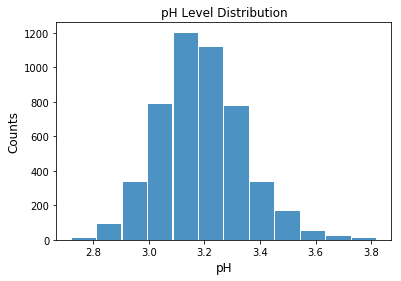

In [14]:
plt.title('pH Level Distribution')
plt.hist(data['pH'], bins=12, rwidth=0.95, alpha=0.8)
plt.xlabel('pH')
plt.ylabel('Counts')
plt.savefig('pH Level Distribution', dpi=500)
plt.show()

We observe that the pH distribution is quite similar to the normal.

In [15]:
def plot_class_distributions(col, title, ylabel, xlabel, adjust=False, save=False):
    '''
    This function creates a nice distribution plot for a particular feature comparing the two classes.
    '''
    
    ax = sns.kdeplot(data[col][data['class'] == 0], shade=True, label = 'Class 0')
    sns.kdeplot(data[col][data['class'] == 1], shade=True, label = 'Class 1')
    
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    
    if adjust:
        margin = float(input('Give the ylim: '))
        ax.set(ylim=(0, margin))
            
    if save:
        savetitle = str(input('Give a save title: '))
        plt.savefig(savetitle, dpi=500)
        
    plt.show()    

Give a save title: AlcoholDensityDistribution


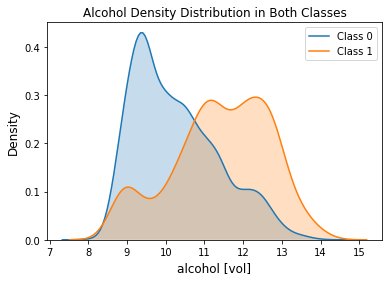

In [16]:
plot_class_distributions('alcohol', 'Alcohol Density Distribution in Both Classes', 'Density', 'alcohol [vol]', save=True)

From the previous graph, we observe that entries that belong to class 1 are expected to have higher values of alcohol percentages. We expect that this feature is quite informative and that it will play a crucial role in the classification task.

Give a save title: pHLevelDistribution


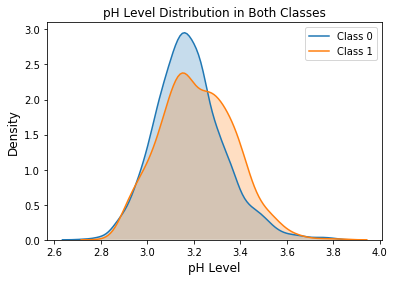

In [17]:
plot_class_distributions('pH', 'pH Level Distribution in Both Classes', 'Density', 'pH Level', adjust=False, save=True)

Give a save title: VolatileAcidityDistribution


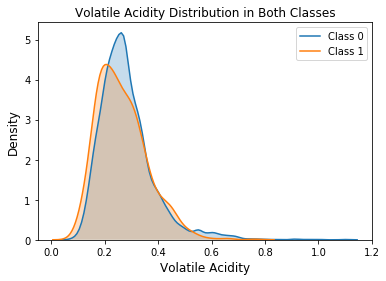

In [18]:
plot_class_distributions('volatile acidity', 'Volatile Acidity Distribution in Both Classes',
                         'Density', 'Volatile Acidity', save=True)

Give a save title: FixedAcidityDistribution


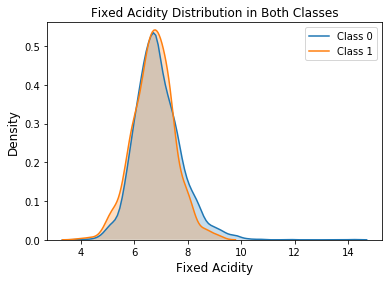

In [19]:
plot_class_distributions('fixed acidity', 'Fixed Acidity Distribution in Both Classes',
                         'Density', 'Fixed Acidity', save=True)

Give the ylim: 7.2
Give a save title: CitricAcidDistribution


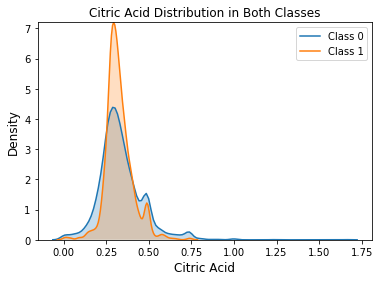

In [22]:
plot_class_distributions('citric acid', 'Citric Acid Distribution in Both Classes',
                         'Density', 'Citric Acid', adjust=True, save=True)

Give the ylim: 0.16
Give a save title: CitricAcidDistribution


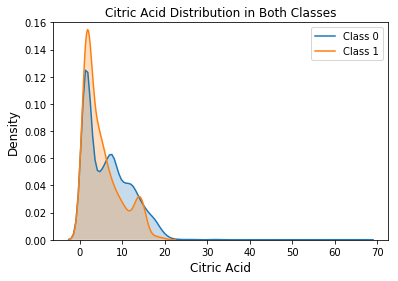

In [23]:
plot_class_distributions('residual sugar', 'Citric Acid Distribution in Both Classes',
                         'Density', 'Citric Acid', adjust=True, save=True)

Give the ylim: 47
Give a save title: ChlorideDistribution


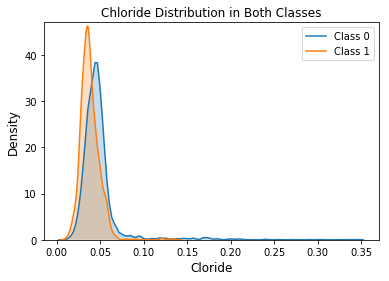

In [24]:
plot_class_distributions('chlorides', 'Chloride Distribution in Both Classes',
                         'Density', 'Cloride', adjust=True, save=True)

Give the ylim: 0.0325
Give a save title: FreeSulfurDioxide


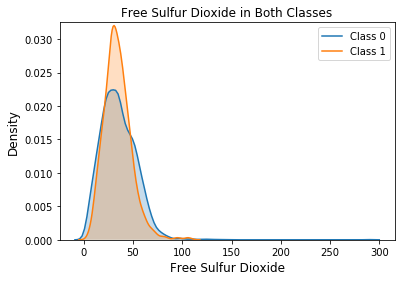

In [25]:
plot_class_distributions('free sulfur dioxide', 'Free Sulfur Dioxide in Both Classes',
                         'Density', 'Free Sulfur Dioxide', adjust=True, save=True)

Give a save title: SulphateDistribution


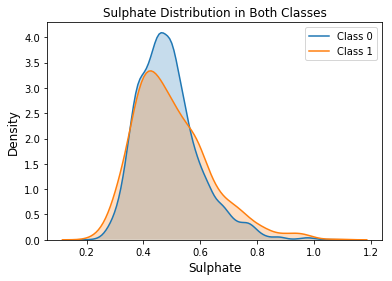

In [26]:
plot_class_distributions('sulphates', 'Sulphate Distribution in Both Classes',
                         'Density', 'Sulphate', save=True)

By observing all the previous graphs we see that probably the most informative feature to define the quality of the wine is alcohol. Good quality wines are expected to have higher alcohol concentration. Apart from that, the pH levels seemed to be  informative and according to the graph, the pH level in good quality wines is high compared low or medium quality wines. The feature that seemed to be less informative seem to be the fixed acidity since the density distributions almost overlap.

## Splitting the Data

Now it is time to select the data and to split it into the train and test part. For that reason we import the `train_test_split` function from sklearn. We will train our model on 67% of our data and test it on the rest 33%. We will also set a numpy random seed and shuffle both the train and the test data.

In [27]:
# Set the random seed to reproduce results
np.random.seed(20)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = data[feature_list]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20, shuffle = True)

## Test the Benchmark Model

Here we will see how the Naive Bays Classifier performs. We use sklearn and we import GaussianNB. We are also interested to know how fast each algorithm performs, and for that reason, we will also import the time module. Finaly, we will also use the $F_1$ score to evaluate the model's performance. Next to it we will also use the accuracy metric to see how many of our predictions were correct. In order to do so, we make the `model_performance` function that trains the model, and then it returns the time it took to train it, its accuracy and $F_1$ score.

In [30]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import learning_curve

In [31]:
def model_perforamce(model):
    '''
    Returns the train  of the model, the accuracy and the F1 score.
    '''
    # Train the model
    InitialTime = time.time()
    model.fit(X_train, y_train)
    FinalTime = time.time()

    # Train time
    trainTime = FinalTime - InitialTime

    # Make predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)

    return trainTime, accuracy, f1score

In [32]:
benchmark_model = GaussianNB()

In [33]:
benchTrainTime, benchAccuracy, benchF1 = model_perforamce(benchmark_model)

In [34]:
print('{:4.1f}% of the test entries were classified correctly by the benchmark model.'.format(100 * benchAccuracy))
print('The F1 score of the benchmark model is {:.4f}'.format(benchF1))
print('It took {:.4f} seconds to make predictions'.format(benchTrainTime))

67.5% of the test entries were classified correctly by the benchmark model.
The F1 score of the benchmark model is 0.5139
It took 0.0035 seconds to make predictions


For a benchmark model, it didn't perform extremely bad. Let's see if the rest of the models can beat this.

## Test the Other Models

We start by importing the models using sklearn.

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [36]:
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
boost_model = AdaBoostClassifier()

In [37]:
treeTrainTime, treeAccuracy, treeF1 = model_perforamce(tree_model)
forestTrainTime, forestAccuracy, forestF1 = model_perforamce(forest_model)
boostTrainTime, boostAccuracy, boostF1 = model_perforamce(boost_model)

We create the following function to plot the several performance metrics between the models.

In [266]:
def plot_histogram(PerfList, ModelList, title, ylabel, adjust=False, save=False):
    '''
    Plots the histogram to compare the models
    '''
    assert len(PerfList) == len(ModelList)
    
    if adjust:
        rotation = int(input('select rotation: '))
    else:
        rotation = 0
    
    N = len(PerfList)
    ind = np.arange(N)
    width = 0.35

    p = plt.bar(ind, PerfList, width)
    plt.ylabel(ylabel)
    #plt.title(title)
    plt.xticks(ind, ModelList, rotation = rotation)
    
    if save:
        savetitle = str(input('Give save title: '))
        plt.savefig(savetitle, dpi=500)
    
    plt.show()

We now create the following lists to be used by the previous function.

In [39]:
ModelList = ['Benchmark Model', 'Decision Tree', 'Random Forest', 'Ada Boost']
TimeList = [benchTrainTime, treeTrainTime, forestTrainTime, boostTrainTime]
AccuracyList = [100 * x for x in [benchAccuracy, treeAccuracy, forestAccuracy, boostAccuracy]]
F1List = [benchF1, treeF1, forestF1, boostF1]

Give save title: TrainingTime


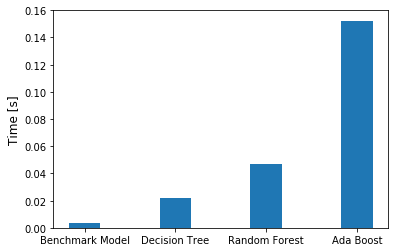

In [273]:
plot_histogram(TimeList, ModelList, 'Training Time for the Models', 'Time [s]', save=True)

We observe that the benchmark model was trained musch faster than the other models. The Adaboost model was significantly slower in training.

Give save title: Accuracy


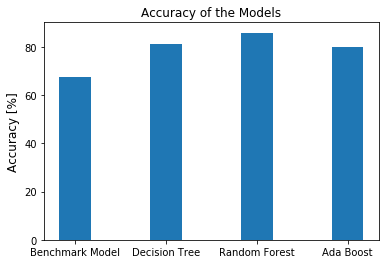

In [41]:
plot_histogram(AccuracyList, ModelList, 'Accuracy of the Models', 'Accuracy [%]', save=True)

In [43]:
print(forestAccuracy, benchAccuracy)

0.859616573902 0.674706246135


We observe that the three chosen models performed quite equaly in terms of accuracy. The benchmark model performed worse than the rest.

Give save title: F1


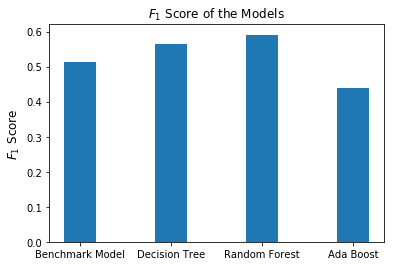

In [44]:
plot_histogram(F1List, ModelList, '$F_1$ Score of the Models', '$F_1$ Score', save=True)

We observe that the three chosen models performed quite equaly in terms of the $F_1$ score. The `AdaBoost` model performed worse than the rest. The random Forest performed slightly better than the Decision Tree. Let's print the $F_1$ score for all the models:

In [46]:
for F1 in [benchF1, treeF1, forestF1, boostF1]:
    print(F1)

0.513863216266
0.565279770445
0.590990990991
0.44020797227


In [47]:
def plot_importances(ImpList, features, title, save=False):
    '''
    Plots the histogram to compare the models
    '''
    assert len(ImpList) == len(features)
    
    N = len(ImpList)
    ind = np.arange(N)
    width = 0.4

    p = plt.bar(ind, ImpList, width)
    plt.title(title)
    plt.xticks(ind, features, rotation = 80)
    plt.tight_layout()
    if save:
        savetitle = str(input('Give savetitle: '))
        plt.savefig(savetitle, dpi=500)
    
    plt.show()

Give savetitle: DecisionTreeFeatureImportance


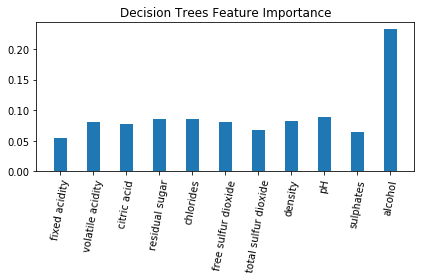

In [48]:
plot_importances(tree_model.feature_importances_, X.columns.tolist(), 'Decision Trees Feature Importance', save=True)

As expected, the alcohol is the most important feature to classify the quality of the wine. The sond most important feature is the volatile acidity  and the third one is the citric acid concentration. The fixed accidity seems to be less informative than the rest.

Give a savetitle: Learning Curves (Adaptive Boosting)


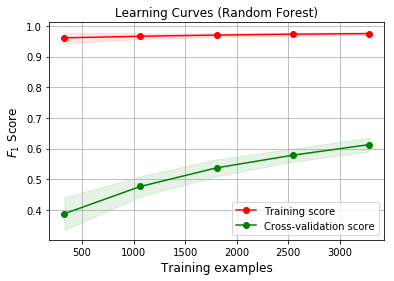

Give a savetitle: Learning Curves (Adaptive Boosting)


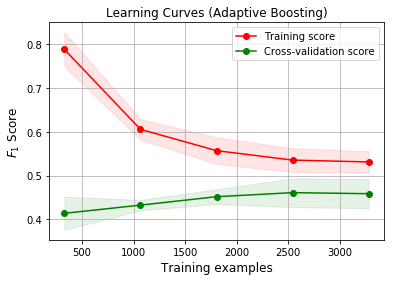

In [55]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# The following Function was imported by 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
# I made some modifications: I used the F1 score instead of Accuracy
#                            I added the save functionality

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), save=False):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Training examples")
    plt.ylabel("$F_1$ Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        scoring='f1', train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    if save:
        savetitle = str(input('Give a savetitle: '))
        plt.savefig(savetitle, dpi=500)
    
    plt.show()


title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=100, test_size=0.33, random_state=0)
plot_learning_curve(forest_model, title, X, y, cv=cv, n_jobs=4, save=True)

title = "Learning Curves (Adaptive Boosting)"
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
plot_learning_curve(boost_model, title, X, y,  cv=cv, n_jobs=4, save=True)

We observe that in the case of the random forest, there is high variance in the case of the random forest and someone could argue that we probably overfit. Adding more data in this case would potentialy help the model to generalize and perform better.

## Fine Tune the Best Model

It turned out that the best model was the random forest, even though the decision tree performed similarly. We will use grid search and cross validation in order to fine tune both models and improve them. Fot that reason, we will import the `GridSearchCV` from `sklearn`. A next step will be to create a stacking metaclasiffier that will take into account the predictions from the Naive Baye's, and the  fine tuned Decision Tree and Random Forest. Finally, we will make a Voting Classifier and compare them all.

### Improve the Existing Models

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {'n_estimators': [10, 12, 14, 15, 16, 17],
             'max_depth': [None, 15, 20, 23, 25, 27, 30],
             'min_samples_split': [2, 3, 4],
             'min_samples_leaf': [1, 2, 3]}

In [58]:
gridsearch = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')

In [59]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 12, 14, 15, 16, 17], 'max_depth': [None, 15, 20, 23, 25, 27, 30], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

Let's print the parameters of the best model.

In [60]:
gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

We see that what changed were the `max_depth` parameters and the `n_estimators`. 

In [199]:
y_pred = gridsearch.predict(X_test)
GridAccuracy = accuracy_score(y_test, y_pred)
GridF1 = f1_score(y_test, y_pred)
print('The F1 score of the fine-tuned Random Forest is {:.3f} and the accuracy is {:.1f}%'
      .format(GridF1, 100*GridAccuracy))

The F1 score of the fine-tuned Random Forest is 0.621 and the accuracy is 86.2%


We observe that the $F_1$ score increased from 0.591 to 0.621. Since the performance of the Decision Tree was comperable to the performance of the Random Forest, it would be nice to fine tune it as well. We will use almost the same parameters for the Decision tree (apart from the `n_estimators` parameter which doesn't exist at the decision tree classifier).

In [200]:
param_grid2 = {'max_depth': [None, 5, 10, 15, 20, 23, 25, 27, 30],
             'min_samples_split': [2, 3, 4, 5],
             'min_samples_leaf': [1, 2, 3, 4, 5]}

In [204]:
gridsearch2 = GridSearchCV(DecisionTreeClassifier(), param_grid2, cv = 5, scoring='f1')

In [205]:
gridsearch2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 5, 10, 15, 20, 23, 25, 27, 30], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [206]:
y2_pred = gridsearch2.predict(X_test)
Grid2Accuracy = accuracy_score(y_test, y2_pred)
Grid2F1 = f1_score(y_test, y2_pred)
print('The F1 score of the fine-tuned Decision Tree is {:.3f} and the accuracy is {:.1f}%'
      .format(Grid2F1, 100*Grid2Accuracy))

The F1 score of the fine-tuned Decision Tree is 0.571 and the accuracy is 81.4%


The Decision Tree didn't significantly improve. Let's print the best parameters.

In [207]:
gridsearch2.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=23,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Build the Stacking MetaClassifier

In [208]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [209]:
lr = LogisticRegression()
MetaClassifier = StackingClassifier(classifiers = [gridsearch.best_estimator_, 
                                                   gridsearch2.best_estimator_, 
                                                   GaussianNB()], meta_classifier = lr)

In [210]:
MetaClassifier.fit(X_train, y_train)

StackingClassifier(average_probas=False,
          classifiers=[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fra...n_leaf=0.0, presort=False, random_state=None,
            splitter='best'), GaussianNB(priors=None)],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          refit=True, store_train_meta_features=False,
          use_features_in_secondary=False, use_probas=False, verbose=0)

In [211]:
y_Mpred = MetaClassifier.predict(X_test)

In [212]:
MetaF1 = f1_score(y_test, y_Mpred)
MetaAccuracy = accuracy_score(y_test, y_Mpred)
print('The F1 score of the Stacking Meta-Classifier is {:.3f} and the accuracy is {:.1f}%'
      .format(MetaF1, 100*MetaAccuracy))

The F1 score of the Stacking Meta-Classifier is 0.567 and the accuracy is 81.2%


The metaclassifier worked worse than the fine tuned Random Forest. Let's now create a voting classifer.

### Build a voting clasiffier.

We will again use the Naive Baye's clasiffier, the fined tuned Random Forest and the Decision tree.

In [213]:
from sklearn.ensemble import VotingClassifier

In [223]:
VoteClf = VotingClassifier(estimators = [('nb', GaussianNB()), 
                                         ('rf', gridsearch.best_estimator_), 
                                         ('dt', gridsearch2.best_estimator_)])

In [224]:
VoteClf.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB(priors=None)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samp...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [225]:
VoteF1 = f1_score(y_test, VoteClf.predict(X_test))
VoteAccuracy = accuracy_score(y_test, VoteClf.predict(X_test))
print('The F1 score of the Voting Classifier is {:.3f} and the accuracy is {:.1f}%'.format(VoteF1, 100*VoteAccuracy))

The F1 score of the Voting Classifier is 0.656 and the accuracy is 85.1%


### Discussion
Let's Compare all the Classifiers.

In [256]:
F1FinalList = [benchF1, treeF1, forestF1, boostF1, Grid2F1, GridF1, MetaF1, VoteF1]
ModelFinalList = ['Bench. \n Model', 'D.Tree', 'R.Forest', 'Ada \n Boost', 
                  'Tuned \n D.Tree','Tuned \n R.Forest', 'Stacking \n Clf', 'Voting \n Clf' ]

In [274]:
print(F1FinalList)

[0.51386321626617371, 0.5652797704447633, 0.59099099099099095, 0.44020797227036401, 0.57061340941512118, 0.62139219015280134, 0.56695156695156701, 0.65620542082738942]


Give save title: F1all


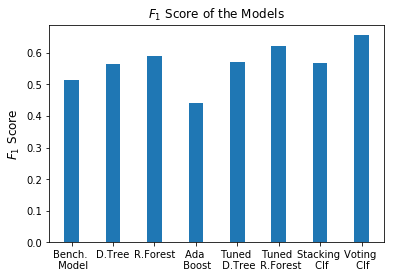

In [257]:
plot_histogram(F1FinalList, ModelFinalList, '$F_1$ Score of the Models', '$F_1$ Score', adjust=False, save=True)

We observe that the best performance was achieved by the voting classifier. The stacking classifier performed almost the same with the fine tuned random forest. Ada Boost had the worst performance. The $F_1$ score for the fine tuned Random Forest was 0.621 and the $F_1$ score of the Voting classifier was 0.656. Their difference between them is not very significant, and I would chose the Voting classifier because it is quite possible that we overfit in the case of the fine tuned random forest. Apart from that there might be some extra features learned better by the Gaussian Naive Bayes and the Decision Tree and this is why the performance of this model is better.

Give a savetitle: Learning Curves (Voting Classifier)


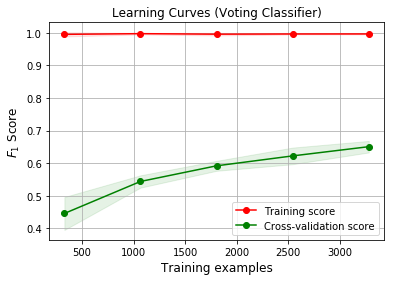

In [236]:
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
plot_learning_curve(VoteClf, 'Learning Curves (Voting Classifier)', X, y, ylim=None, cv=cv,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), save=True)

By observing the previous graph, we can see that there is high variance since the difference between the Training score and the Cross Validation Score is significant. Adding more data would definately help the model to improve even more. This is also shown in the graph above since increasing the training examples results in higher $F_1$ score.